# Comcast Telecom Consumer Complaints


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [91]:
df=pd.read_csv("Comcast_telecom_complaints_data.csv")

In [92]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [93]:
df.shape

(2224, 11)

In [94]:
df[df.isnull()].count()

##No null values

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [95]:
df.describe(include='all')

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224,2224.000000,2224,2224
unique,2224,1841,91,91,2190,2,928,43,NaN,4,2
top,326331,Comcast,24-06-15,24-Jun-15,9:22:46 AM,Customer Care Call,Atlanta,Georgia,NaN,Solved,No
freq,1,83,218,218,2,1119,63,288,NaN,973,2021
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47994.393435,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28885.279427,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30056.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37211.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77058.750000,NaN,NaN


## EDA and Cleaning the data set

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


### TASK 1 - Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [97]:
df['Date_month_year'] = pd.to_datetime(df['Date_month_year'])
df['Created_Month'] =  df['Date_month_year'].apply(lambda x: x.month)
df['Created_Day'] = df['Date_month_year'].apply(lambda x: x.day)
df['Created_Day of Week'] = df['Date_month_year'].apply(lambda x: x.dayofweek)

In [98]:
df['Created_Month'].head(10)

0     4
1     8
2     4
3     7
4     5
5    12
6     6
7     6
8     1
9     6
Name: Created_Month, dtype: int64

In [99]:
df['Created_Day']

0       22
1        4
2       18
3        5
4       26
        ..
2219     4
2220     6
2221     6
2222    23
2223    24
Name: Created_Day, Length: 2224, dtype: int64

In [100]:
df['Created_Day of Week'].head(10)


0    2
1    1
2    5
3    6
4    1
5    6
6    2
7    1
8    1
9    6
Name: Created_Day of Week, dtype: int64

In [101]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
df['Created_Day of Week']=df['Created_Day of Week'].map(dmap)


In [102]:
df['Created_Day of Week']

0       Wed
1       Tue
2       Sat
3       Sun
4       Tue
       ... 
2219    Wed
2220    Fri
2221    Sun
2222    Tue
2223    Wed
Name: Created_Day of Week, Length: 2224, dtype: object

In [103]:
df.head(5)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Created_Month,Created_Day,Created_Day of Week
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22,Wed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4,Tue
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18,Sat
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5,Sun
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26,Tue


In [104]:
plt.figure(figsize=(8,4))

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

### 1. Monthly Complaints

Text(6, 1010, 'Max complaints in Jun')

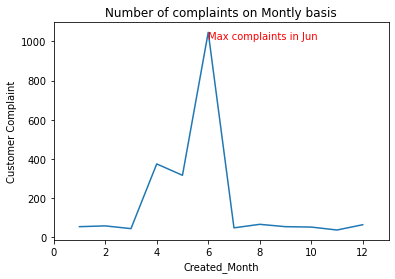

In [105]:
#Number of complaints on Monthly basis
plt.title('Number of complaints on Montly basis')
bymonth = df.groupby('Created_Month').count().reset_index()
lp = sns.lineplot(x='Created_Month', y= 'Customer Complaint', data = bymonth, sort=False,markers = "o")
ax = lp.axes
ax.set_xlim(0,13)
ax.annotate('Max complaints in Jun', color='red', xy=(6, 1010))


### 2. Daily Complaints

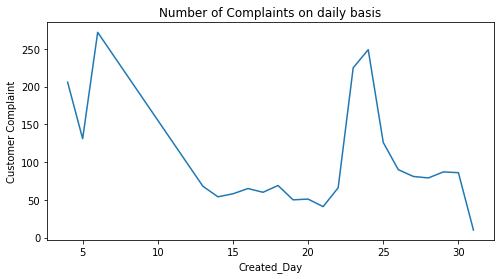

In [106]:
#Number of complaints on daily basis
plt.figure(figsize=(8,4))
plt.title('Number of Complaints on daily basis')
byday=df.groupby('Created_Day').count().reset_index()
lp=sns.lineplot(x="Created_Day", y='Customer Complaint', data=byday,sort=False,markers="o")


### 3. Weekly Complaints

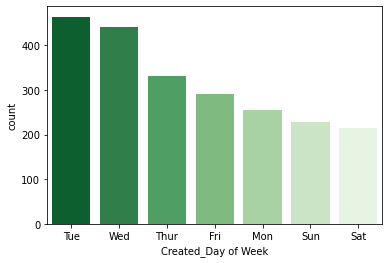

In [107]:
#number of complaints based on created day of the week

sns.countplot(x='Created_Day of Week',data=df,order=df['Created_Day of Week'].value_counts().index,palette="Greens_r")
# Maximum complaints have been registered on Tuesday and Wednesday

#### Task 1 Completed
We have found the no.of complaints on the basis of days,month and weekly by applying lambda function which helps us to convert datetime to numerical format.

   Results:
   
    1.June Month has maximum complaints
    2. Day 7 and Day 22 has maximum complaints
    3.Tuesday and wednesday have maximum complaints
    

## TASK 2 - Provide a table with the frequency of complaint types.


In [108]:
df['Customer Complaint'].value_counts().head(10)

Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Data Caps                   11
Comcast Billing             11
Comcast Data Caps           11
Unfair Billing Practices     9
Comcast data cap             8
Comcast internet             8
Name: Customer Complaint, dtype: int64

In [109]:
import nltk

In [110]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [111]:
from wordcloud import WordCloud,STOPWORDS
common_complaints=df['Customer Complaint'].dropna().tolist()
common_complaints=''.join(common_complaints).lower()

In [125]:
list_stop=('comcast','Now',"Company",'Day','Someone','Thing','Also','Got','Way','Call','Called','One','Said','Tell')


In [126]:
for word in list_stop:
    STOPWORDS.add(word)

In [127]:
wordcloud=WordCloud(stopwords=STOPWORDS,width=2000,height=1500,background_color='white').generate(common_complaints)

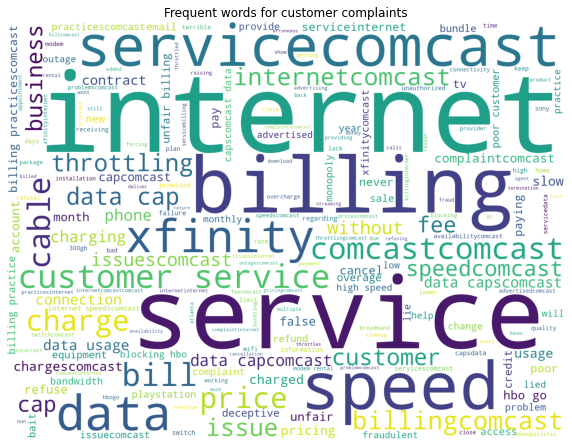

In [128]:
plt.figure(figsize=(10,12))
plt.imshow(wordcloud)
plt.title('Frequent words for customer complaints ')
plt.axis('off')
plt.show()

### TASK 3 - Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.


In [131]:
### just applying if else condition 

df['New_Status'] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df["Status"]]

In [132]:
df['New_Status'].unique()

array(['Closed', 'Open'], dtype=object)

### TASK 4 - Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from task 3


In [138]:
st_cmp=df.groupby(['State','New_Status']).size().unstack().fillna(0)

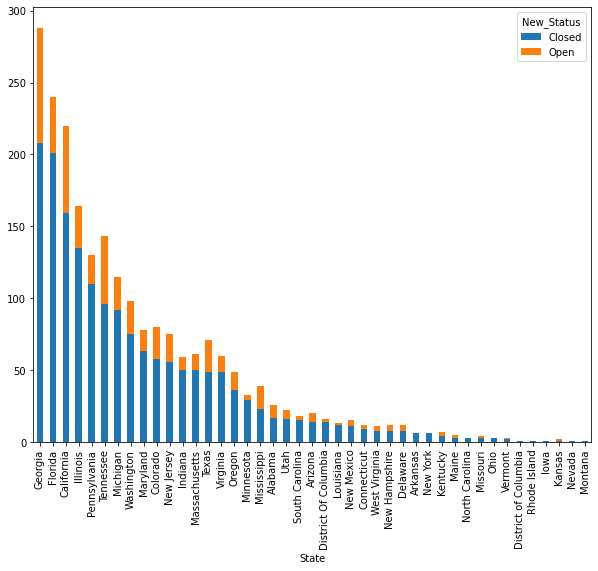

In [148]:
st_cmp.sort_values('Closed',axis = 0,ascending=False).plot(kind="bar", figsize=(10,8), stacked=True)

### TASK 5 - Which state has the maximum complaints. Which state has the highest percentage of unresolved complaints


In [158]:

df.groupby(['State']).size().sort_values(ascending=False).head(1)

## Georgia has the maximum complaints

State
Georgia    288
dtype: int64

In [181]:
CT = df.groupby(["State","New_Status"]).size().unstack().fillna(0)
CT.sort_values('Open',axis = 0,ascending=False)[:1]


New_Status,Closed,Open
State,,
Georgia,208.0,80.0


In [182]:
CT['Unresolved_cmp_prct'] = CT['Open']/CT['Open'].sum()*100

In [183]:
CT.sort_values('Unresolved_cmp_prct',axis = 0,ascending=False)[:1]

New_Status,Closed,Open,Unresolved_cmp_prct
State,,,
Georgia,208.0,80.0,15.473888


### TASK 6 --- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.


In [184]:
cr = df.groupby(['Received Via','New_Status']).size().unstack().fillna(0)
cr['resolved'] = cr['Closed']/cr['Closed'].sum()*100
cr['resolved']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64